In [1]:
#cognitive_faceをインストールしていない場合はコメントアウトを外す
# !pip install cognitive_face

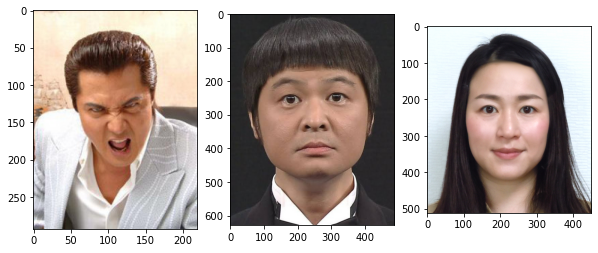

In [2]:
%matplotlib inline
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

number = ["1", "2", "3"]
#ファイルパス取得(フォルダ内の各jpgファイルのパス)
picture_path = [] 
for i in number:
    exec(f"file = os.path.abspath('face{i}.jpg')")
    picture_path.append(file)

#3枚の画像表示(右から怒り顔，真顔，笑顔)
plt.figure(figsize=(10,8))
for i,d in enumerate(picture_path):
    plt.subplot(1,3,i+1)
    plt.imshow(mpimg.imread(d),cmap="gray")

In [3]:
import cognitive_face as CF
import pandas as pd

#KEYは自分のAPIの番号
#BASE_URLは以下のまま
KEY = '58e041f1da53411c97259e5c8b671521'
BASE_URL = 'https://japaneast.api.cognitive.microsoft.com/face/v1.0'

CF.Key.set(KEY)
CF.BaseUrl.set(BASE_URL)

#各画像より感情値を推定
number = ["1", "2", "3"]
face = pd.DataFrame([])
for i in number:
    exec(f"img_url = 'face{i}.jpg'")
    faces = CF.face.detect(img_url, attributes='emotion')
    faces = pd.DataFrame(faces[0]['faceAttributes']).T
    face = pd.concat([face, faces], ignore_index=False)

#インデックスの指定
face.index = ["怒り顔", "真顔", "笑顔"]
display(face)

,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise
怒り顔,1.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000
真顔,0.0,0.002,0.0,0.0,0.000,0.871,0.004,0.123
笑顔,0.0,0.000,0.0,0.0,0.943,0.057,0.000,0.000
